<a href="https://colab.research.google.com/github/ilunsenody-source/TP-de-Mr.-Edourd/blob/main/TP%20Mr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LE TP DE ILUNGA SHIMBI ENODY BAC 4

# Thème : Prédiction du temps de latence dans un réseau informatique à partir de paramètres techniques.

# 1 : Importation & exploration DE BIBLIOTHEQUE

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Charger les données

In [34]:
df = pd.read_csv("tp.csv")

# Vérifier
print(df.head())

   Bande_passante_Mbps  Distance_km  Taux_utilisation_%  Nb_sauts  Type_lien  \
0                 10.0          2.0                30.0       2.0        0.0   
1                 20.0          5.0                40.0       3.0        0.0   
2                 20.0          5.0                40.0       3.0        0.0   
3                 50.0         10.0                60.0       4.0        0.0   
4                100.0         15.0                70.0       5.0        0.0   

   Latence_ms  
0        18.0  
1        25.0  
2        25.0  
3        40.0  
4        55.0  


In [35]:
df.shape

(24, 6)

In [36]:
df.isna
df.isna().sum()

,0
Bande_passante_Mbps,3
Distance_km,3
Taux_utilisation_%,3
Nb_sauts,3
Type_lien,3
Latence_ms,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bande_passante_Mbps  21 non-null     float64
 1   Distance_km          21 non-null     float64
 2   Taux_utilisation_%   21 non-null     float64
 3   Nb_sauts             21 non-null     float64
 4   Type_lien            21 non-null     float64
 5   Latence_ms           21 non-null     float64
dtypes: float64(6)
memory usage: 1.3 KB


# 2 : Analyse & visualisation

In [38]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

#Latence vs Taux d'utilisation

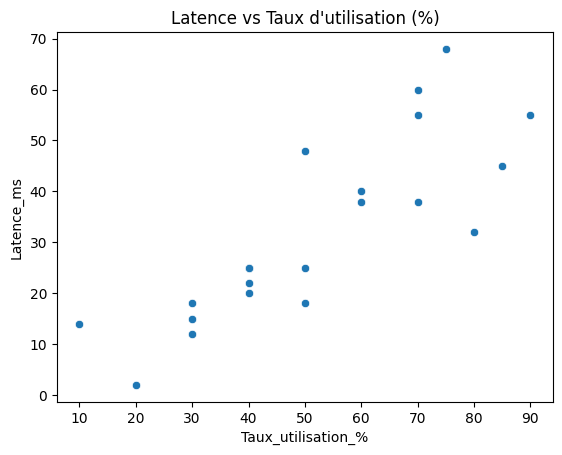

In [39]:
sns.scatterplot(x="Taux_utilisation_%", y="Latence_ms", data=df)
plt.title("Latence vs Taux d'utilisation (%)")
plt.show()

# Latence vs Taux d'utilisation

Text(0.5, 1.0, "Latence vs Taux d'utilisation (%)")

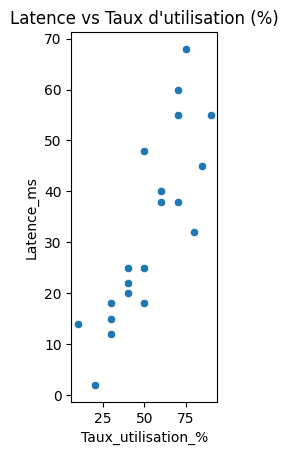

In [40]:
plt.subplot(1,3,2)
sns.scatterplot(x="Taux_utilisation_%", y="Latence_ms", data=df)
plt.title("Latence vs Taux d'utilisation (%)")

# Latence vs Bande passante

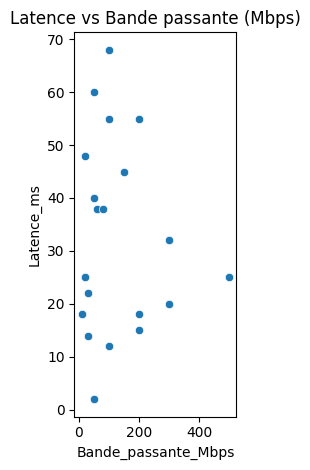

In [41]:
plt.subplot(1,3,3)
sns.scatterplot(x="Bande_passante_Mbps", y="Latence_ms",data=df)
plt.title("Latence vs Bande passante (Mbps)")

plt.tight_layout()
plt.show()

# 3 : Préparation du modèle

In [42]:
X = df[["Bande_passante_Mbps","Distance_km","Taux_utilisation_%","Nb_sauts","Type_lien"]]
y = df["Latence_ms"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(df["Latence_ms"].isnull().sum())

3


In [44]:
X = df[["Bande_passante_Mbps","Distance_km","Taux_utilisation_%","Nb_sauts","Type_lien"]]
y = df["Latence_ms"]

## Entraînement du modèle

In [45]:
df = df.dropna(subset=["Latence_ms"])

In [46]:
X = df[["Bande_passante_Mbps","Distance_km","Taux_utilisation_%","Nb_sauts","Type_lien"]]
y = df["Latence_ms"]

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(y.isnull().sum())

3


In [24]:
df = df.dropna(subset=["Latence_ms"])
X = df[["Bande_passante_Mbps","Distance_km","Taux_utilisation_%","Nb_sauts","Type_lien"]]
y = df["Latence_ms"]

In [25]:
y = pd.to_numeric(y, errors="coerce")
df = df.dropna(subset=["Latence_ms"])

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Évaluation

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² :", r2_score(y_test, y_pred))

MAE : 9.104974896168276
RMSE : 9.477802864302001
R² : 0.8334530793262919


# Importance des variables

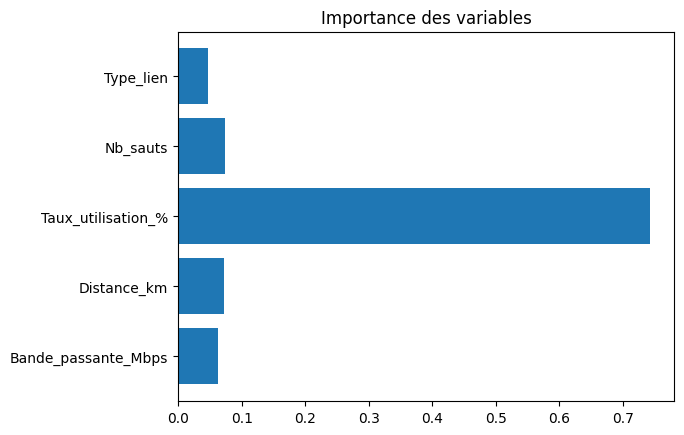

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
importances = rf_reg.feature_importances_
y_pred_rf = rf_reg.predict(X_test)
plt.barh(X.columns, importances)
plt.title("Importance des variables")
plt.show()